In [1]:
# from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
data = pd.read_csv('https://raw.githubusercontent.com/Shakirov-ER/brunoyam-ds-SC381-2952/main/data/Boston.csv', index_col=0)
data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [8]:
data = data.rename(columns={'age':'y'})
data

,crim,zn,indus,chas,nox,rm,y,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [9]:
y_df = data[['y']]
y_df.head()

,y
1,65.2
2,78.9
3,61.1
4,45.8
5,54.2


In [10]:
x_df = data.drop(columns='y')
x_df.head

<bound method NDFrame.head of         crim    zn  indus  chas    nox     rm     dis  rad  tax  ptratio  \
1    0.00632  18.0   2.31     0  0.538  6.575  4.0900    1  296     15.3   
2    0.02731   0.0   7.07     0  0.469  6.421  4.9671    2  242     17.8   
3    0.02729   0.0   7.07     0  0.469  7.185  4.9671    2  242     17.8   
4    0.03237   0.0   2.18     0  0.458  6.998  6.0622    3  222     18.7   
5    0.06905   0.0   2.18     0  0.458  7.147  6.0622    3  222     18.7   
..       ...   ...    ...   ...    ...    ...     ...  ...  ...      ...   
502  0.06263   0.0  11.93     0  0.573  6.593  2.4786    1  273     21.0   
503  0.04527   0.0  11.93     0  0.573  6.120  2.2875    1  273     21.0   
504  0.06076   0.0  11.93     0  0.573  6.976  2.1675    1  273     21.0   
505  0.10959   0.0  11.93     0  0.573  6.794  2.3889    1  273     21.0   
506  0.04741   0.0  11.93     0  0.573  6.030  2.5050    1  273     21.0   

      black  lstat  medv  
1    396.90   4.98  24.0  
2  

In [11]:
# full_df = pd.concat([x_df, y_df], axis=1)
# sns.pairplot(full_df)

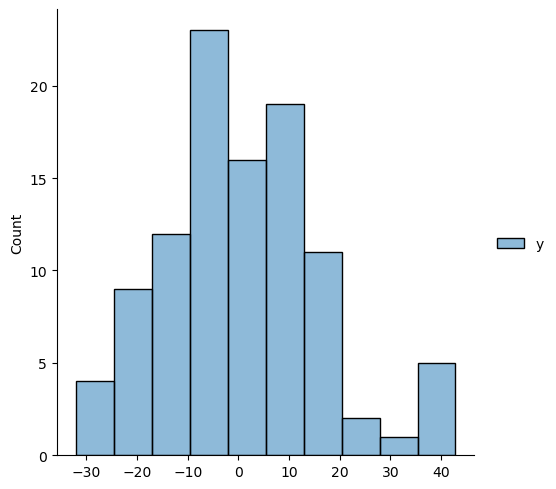

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, train_size=0.8, random_state=42)
x_train.shape, x_test.shape
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
sns.displot(y_pred-y_test)

In [13]:
mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred)

(243.22916559515986, 0.7057114704529)

In [15]:
from sklearn.linear_model import Ridge, Lasso
model = Ridge()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred)

(253.41392335062446, 0.6933886991424978)

In [16]:
from sklearn.linear_model import Ridge, Lasso
model = Lasso()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred)

(275.7488161823435, 0.6663652015575952)